How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

No. of multiplications would be n * k * m.For k columns of the first matrix, the 1 row the no. of multiplications would be m * k, thus for n rows it would be n * k * m.
No.of additions would be n * m * (k-1).

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
def multiply(a,b):
  c=[]
  for x in range(len(a)):
    c.append([])
    for y in range(len(b[0])):
      c[x].append(0)
  print(c)
  for i in range(len(a)):
    for j in range(len(b[0])):
      for k in range(len(b)):
        c[i][j]+=a[i][k]*b[k][j]
  print(c)

a=[[3,2],[4,9],[2,3]]
b=[[1,2,3,4],[1,2,3,4]]
multiply(a,b)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[5, 10, 15, 20], [13, 26, 39, 52], [5, 10, 15, 20]]


Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [16]:
import numpy
import time

#The algorithm mentioned in the question is bubblesort

def selection(l):
  for i in range(len(l)-1,-1,-1):
    max=l[i]
    current=i
    for j in range(i):
      if (max<l[j]):
        max=l[j]
        current=j
    l[current],l[i]=l[i],l[current]

def median(l):
  if (len(l)%2!=0):
    return l[len(l)//2]
  else:
    return ((l[len(l)//2]+l[len(l)//2-1])/2)

l=[5,4,3,2,1]
t1=time.time()
selection(l)
med=median(l)
t2=time.time()
print(med)
print(t2-t1)

3
0.00012040138244628906


In [17]:
#A faster method would be using Quicksort
def partition(l,start,end):
  pivot=l[start]
  i=start+1
  j=end
  while i<=j:
    while i<=end and l[i]<=pivot:
      i+=1
    while j>=start and l[j]>pivot:
      j-=1
    if i<j:
      l[i],l[j]=l[j],l[i]
      i=i+1
      j=j-1
  if i<=end:
    l[i-1],l[start]=l[start],l[i-1]
    return i-1
  else:
    l[end],l[start]=l[start],l[end]
    return end

def quicksort(l,start,end):
  if end<=start:
    return
  index=partition(l,start,end)
  quicksort(l,start,index-1)
  quicksort(l,index+1,end)

l=[5,4,3,2,1]
t3=time.time()
quicksort(l,0,len(l)-1)
med=median(l)
t4=time.time()
print(med)
print(t4-t3)

3
0.00063323974609375


In [18]:
#Using np.median
t5=time.time()
np.median(l)
t6=time.time()
print(t6-t5)

0.0016407966613769531


What is the gradient of the following function with respect to x and y?

$$x^2 y + y^3 \sin(x)$$

w.r.t x:

$$2 x y + y^3 \cos(x)$$

w.r.t y:

$$x^2 + 3 y^2 \sin(x)$$

Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [20]:
import jax
import jax.numpy as jnp

def f(x, y):
    return ((x**2)*y)+((y**3)*jnp.sin(x))

#w.r.t x
grad_x=jax.grad(f, argnums = 0)

#w.r.t y
grad_y=jax.grad(f, argnums = 1)

print(grad_x(float(0),float(0)))
print(grad_x(float(1),float(1)))
print(grad_y(float(0),float(0)))
print(grad_y(float(1),float(1)))

0.0
2.5403023
0.0
3.5244129


Use sympy to confirm that you obtain the same gradient analytically.

In [21]:
import sympy as sp

x,y= sp.symbols("x y")
f=((x**2)*y)+((y**3)*sp.sin(x))
grad=sp.Matrix([f.diff(x), f.diff(y)])
print(grad)

Matrix([[2*x*y + y**3*cos(x)], [x**2 + 3*y**2*sin(x)]])


Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

$$y = x$$

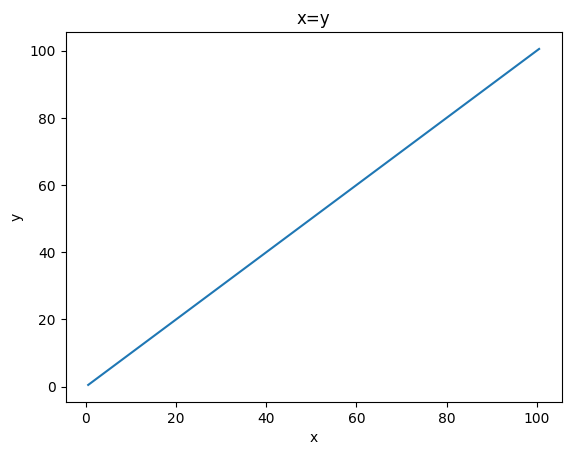

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,101,0.5)
y=x
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("x=y")
plt.show()

$$y = x^2$$

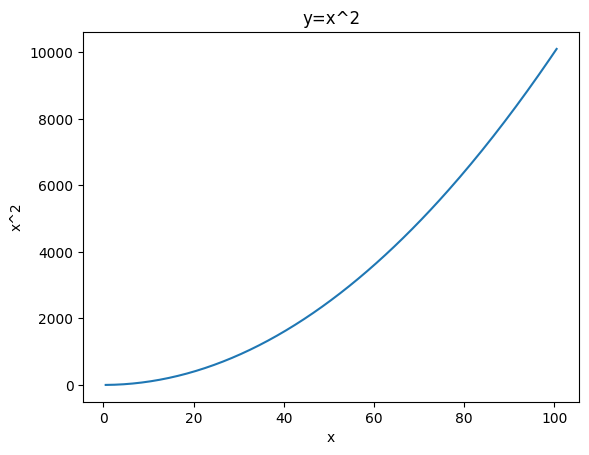

In [3]:
y=x**2
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("x^2")
plt.title("y=x^2")
plt.show()

$$y = x^3/100$$

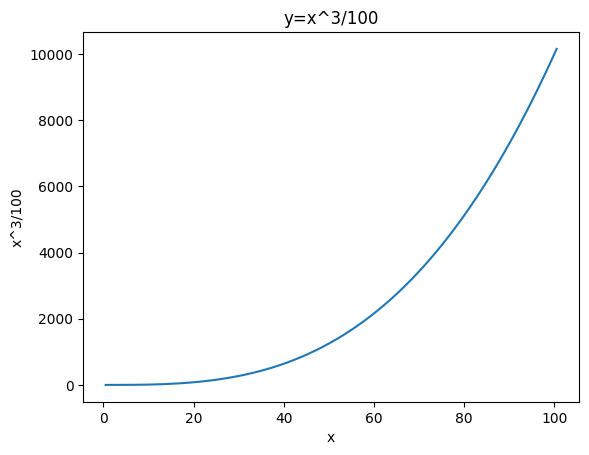

In [4]:
y=(x**3)/100
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("x^3/100")
plt.title("y=x^3/100")
plt.show()

$$y = \sin(x)$$

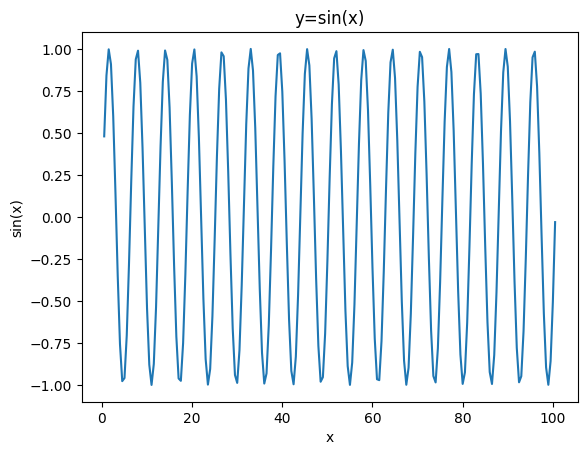

In [5]:
y=np.sin(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("y=sin(x)")
plt.show()

$$y = \sin(x)/x$$

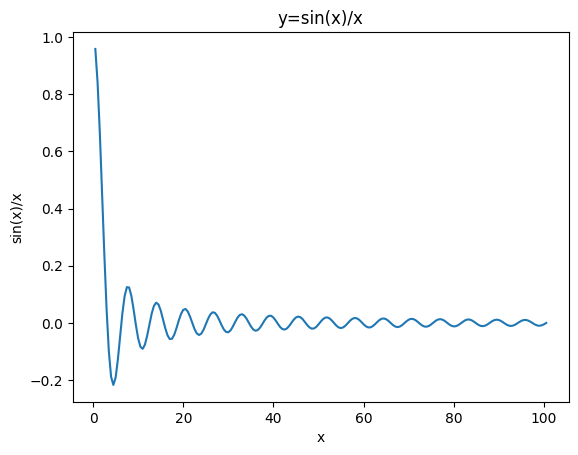

In [6]:
y=np.sin(x)/x
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("sin(x)/x")
plt.title("y=sin(x)/x")
plt.show()

$$y = \log(x)$$

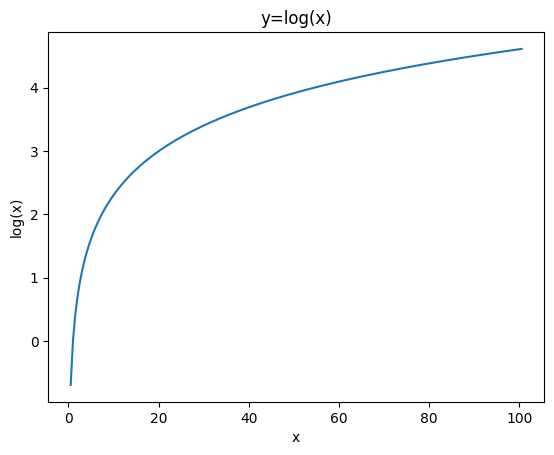

In [7]:
y=np.log(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("log(x)")
plt.title("y=log(x)")
plt.show()

$$y = e^x$$

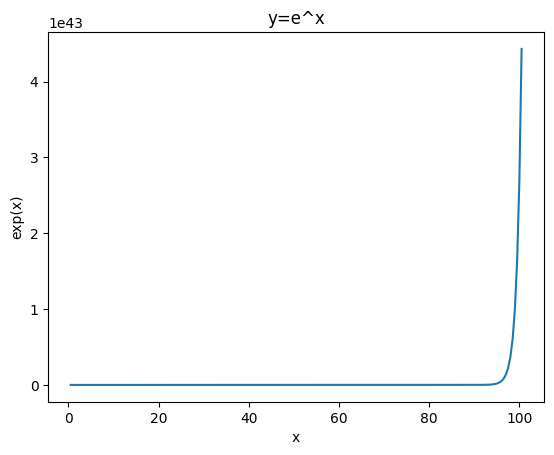

In [8]:
y=np.exp(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("exp(x)")
plt.title("y=e^x")
plt.show()

In [9]:
f=((x**2)*y)+(y**3)*(np.sin(x))


Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [10]:
m=np.random.uniform(1,2,(20,5))
print(m)

[[1.56881296 1.96149678 1.75982986 1.48904569 1.73564517]
 [1.5357439  1.02895285 1.68256418 1.21583138 1.24038003]
 [1.93350674 1.93868832 1.60697706 1.46816351 1.0757589 ]
 [1.8971489  1.82189612 1.51803475 1.29849487 1.25333433]
 [1.33759723 1.43099201 1.87732992 1.475989   1.1558124 ]
 [1.37862705 1.21039967 1.77399415 1.49228243 1.17673833]
 [1.26761011 1.10838634 1.30554765 1.2301932  1.86944094]
 [1.150183   1.99032774 1.81906536 1.22901944 1.03934158]
 [1.23228515 1.29824608 1.39823997 1.80074067 1.87504752]
 [1.14807857 1.95307638 1.40353196 1.72908398 1.72860344]
 [1.72119651 1.07522934 1.77001733 1.01343417 1.40538533]
 [1.02480855 1.5484499  1.49014096 1.81277412 1.55191678]
 [1.10920241 1.78309804 1.79201445 1.3278584  1.51461535]
 [1.82391827 1.32202059 1.25508228 1.65022829 1.91315341]
 [1.04007528 1.10423356 1.92771219 1.21672526 1.73990172]
 [1.91738004 1.95073713 1.65733502 1.67840288 1.10320266]
 [1.73621537 1.37653445 1.84125848 1.44571501 1.24511566]
 [1.42007157 1

In [11]:
import pandas as pd
df=pd.DataFrame(m,columns=["a","b","c","d","e"])
print(df)

           a         b         c         d         e
0   1.568813  1.961497  1.759830  1.489046  1.735645
1   1.535744  1.028953  1.682564  1.215831  1.240380
2   1.933507  1.938688  1.606977  1.468164  1.075759
3   1.897149  1.821896  1.518035  1.298495  1.253334
4   1.337597  1.430992  1.877330  1.475989  1.155812
5   1.378627  1.210400  1.773994  1.492282  1.176738
6   1.267610  1.108386  1.305548  1.230193  1.869441
7   1.150183  1.990328  1.819065  1.229019  1.039342
8   1.232285  1.298246  1.398240  1.800741  1.875048
9   1.148079  1.953076  1.403532  1.729084  1.728603
10  1.721197  1.075229  1.770017  1.013434  1.405385
11  1.024809  1.548450  1.490141  1.812774  1.551917
12  1.109202  1.783098  1.792014  1.327858  1.514615
13  1.823918  1.322021  1.255082  1.650228  1.913153
14  1.040075  1.104234  1.927712  1.216725  1.739902
15  1.917380  1.950737  1.657335  1.678403  1.103203
16  1.736215  1.376534  1.841258  1.445715  1.245116
17  1.420072  1.010067  1.625208  1.250665  1.

In [12]:
max_dev=0
max_col=None
for i in df:
  dev=df[i].std()
  if dev>max_dev:
    max_dev=dev
    max_col=i
print(max_col)

b


In [13]:
min_mean=np.inf
min_row=None
for i in df.index:
  mean=df.loc[i].mean()
  if mean<min_mean:
    min_mean=mean
    min_row=i
print(min_row)

1


Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [14]:
df["f"]=df["a"]+df["b"]+df["c"]+df["d"]+df["e"]
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")
print(df)

           a         b         c         d         e         f    g
0   1.568813  1.961497  1.759830  1.489046  1.735645  8.514830  GT8
1   1.535744  1.028953  1.682564  1.215831  1.240380  6.703472  LT8
2   1.933507  1.938688  1.606977  1.468164  1.075759  8.023095  GT8
3   1.897149  1.821896  1.518035  1.298495  1.253334  7.788909  LT8
4   1.337597  1.430992  1.877330  1.475989  1.155812  7.277721  LT8
5   1.378627  1.210400  1.773994  1.492282  1.176738  7.032042  LT8
6   1.267610  1.108386  1.305548  1.230193  1.869441  6.781178  LT8
7   1.150183  1.990328  1.819065  1.229019  1.039342  7.227937  LT8
8   1.232285  1.298246  1.398240  1.800741  1.875048  7.604559  LT8
9   1.148079  1.953076  1.403532  1.729084  1.728603  7.962374  LT8
10  1.721197  1.075229  1.770017  1.013434  1.405385  6.985263  LT8
11  1.024809  1.548450  1.490141  1.812774  1.551917  7.428090  LT8
12  1.109202  1.783098  1.792014  1.327858  1.514615  7.526789  LT8
13  1.823918  1.322021  1.255082  1.650228  1.91

In [19]:
row_LT8=df[df["g"]=="LT8"].shape[0]
print(row_LT8)

17


In [20]:
std_LT8=df[df["g"]=="LT8"]["f"].std()
print(std_LT8)
std_GT8=df[df["g"]=="GT8"]["f"].std()
print(std_GT8)

0.3934539390793886
0.2468497643538787


Write a small piece of code to explain broadcasting in numpy.



In [19]:
#broadcasting in array refers to perfroming arithemetic operations such as addition on arrays of different shapes, where the smaller array get added onto the larger array.
a1=np.array([1,2,3])
a2=np.array([[1,2,3],[4,5,6]])
print(a1+a2)

[[2 4 6]
 [5 7 9]]


Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [3]:
import numpy as np
def arg_min(a):
    min_index = 0
    min_value = 0
    for i in range(len(a)):
        if a[i] < min_value:
            min_value = array[i]
            min_index = i
    return min_index

a=np.array([1,2,3,4,5])
print(arg_min(a))
b=np.argmin(a)
print(b)

0
0
